太陽高度: 4.8度
RGB値: [248 248 248]


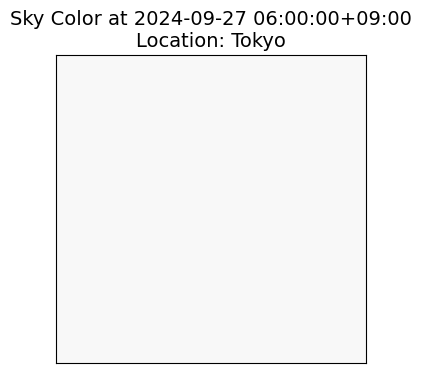

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astral.sun import elevation
from astral import LocationInfo
from datetime import datetime, timezone, timedelta

# 大気のパラメータ
RAYLEIGH_SCATTER_CONST = 0.0025  # レイリー散乱定数の簡易モデル

# 緯度と経度、現在の時刻を指定（例として東京）
city = LocationInfo("Tokyo", "Japan", "Asia/Tokyo", 35.6895, 139.6917)
# now = datetime.now()
now = datetime(2024, 9, 27, 6, 0, 0, tzinfo=timezone(timedelta(hours=9)))

# 太陽の位置を計算
sun_altitude = elevation(city.observer, now)  # 太陽高度（度）

# 太陽高度が負の場合（夜間）は黒に設定
if sun_altitude < 0:
    sky_rgb = np.array([0, 0, 0])  # 夜は黒
else:
    # レイリー散乱による青い空のモデル（簡易版）
    # 太陽高度に基づいて空の色を変える
    def rayleigh_scatter(wavelength, altitude):
        return np.exp(-RAYLEIGH_SCATTER_CONST / (np.cos(np.radians(90 - altitude)) + 0.01))

    # 波長に対応するRGB (赤: 650nm, 緑: 510nm, 青: 475nm) 
    wavelengths = {'R': 650, 'G': 510, 'B': 475}
    
    # 各波長に対して散乱を計算
    scatter_factors = {color: rayleigh_scatter(wavelength, sun_altitude) for color, wavelength in wavelengths.items()}
    
    # RGB値を0~1に正規化
    sky_rgb = [scatter_factors['R'], scatter_factors['G'], scatter_factors['B']]

    # 0~1の範囲で計算したRGB値を0~255に変換
    sky_rgb = np.clip(np.array(sky_rgb) * 255, 0, 255).astype(int)

# 結果を表示
print(f"太陽高度: {sun_altitude:.1f}度")
print(f"RGB値: {sky_rgb}")

# 結果をグラフで描画
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_facecolor(sky_rgb / 255)  # 背景色に設定
ax.set_xticks([]), ax.set_yticks([])  # 軸目盛を非表示
plt.title(f"Sky Color at {now}\nLocation: {city.name}", fontsize=14)
plt.show()
